****
## JSON exercise with World Bank data

Goal of this exercise:

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [218]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
# Import data as pandas dataframe
data_wb=pd.read_json('data/world_bank_projects.json')

In [220]:
df=data_wb[['countrycode','countryname','mjtheme_namecode']]

In [221]:
df.head()

,countrycode,countryname,mjtheme_namecode
0,ET,Federal Democratic Republic of Ethiopia,"[{'code': '8', 'name': 'Human development'}, {..."
1,TN,Republic of Tunisia,"[{'code': '1', 'name': 'Economic management'},..."
2,TV,Tuvalu,"[{'code': '5', 'name': 'Trade and integration'..."
3,RY,Republic of Yemen,"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,LS,Kingdom of Lesotho,"[{'code': '5', 'name': 'Trade and integration'..."


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
countrycode         500 non-null object
countryname         500 non-null object
mjtheme_namecode    500 non-null object
dtypes: object(3)
memory usage: 11.8+ KB


In [223]:
# Read data with json.load
df2=json.load(open('data/world_bank_projects.json'))

In [224]:
#normalize data
df2_norm=json_normalize(df2,'mjtheme_namecode',['countrycode','countryname'])

In [225]:
df2_norm.head()

,code,name,countrycode,countryname
0,8,Human development,ET,Federal Democratic Republic of Ethiopia
1,11,,ET,Federal Democratic Republic of Ethiopia
2,1,Economic management,TN,Republic of Tunisia
3,6,Social protection and risk management,TN,Republic of Tunisia
4,5,Trade and integration,TV,Tuvalu


In [226]:
df2_norm.describe()

,code,name,countrycode,countryname
count,1499,1499,1499,1499
unique,11,12,118,118
top,11,Environment and natural resources management,ID,Republic of Indonesia
freq,250,223,56,56


## 1. Find the 10 countries with most projects

In [227]:
# Count unique values for each country
freq_countries=df2_norm.countryname.value_counts()
# Top 10
print(freq_countries[0:10])

Republic of Indonesia              56
Republic of India                  51
Socialist Republic of Vietnam      43
People's Republic of Bangladesh    41
Federative Republic of Brazil      41
People's Republic of China         40
Africa                             39
Republic of Yemen                  34
Kingdom of Morocco                 32
Republic of Mozambique             31
Name: countryname, dtype: int64


In [228]:
# Create a data frame with top 10 countries' frequency counts
top10_countries = pd.DataFrame({'Country Name':freq_countries[0:10].index,'Counts':freq_countries[0:10].values})

In [229]:
print(top10_countries)

                      Country Name  Counts
0            Republic of Indonesia      56
1                Republic of India      51
2    Socialist Republic of Vietnam      43
3  People's Republic of Bangladesh      41
4    Federative Republic of Brazil      41
5       People's Republic of China      40
6                           Africa      39
7                Republic of Yemen      34
8               Kingdom of Morocco      32
9           Republic of Mozambique      31


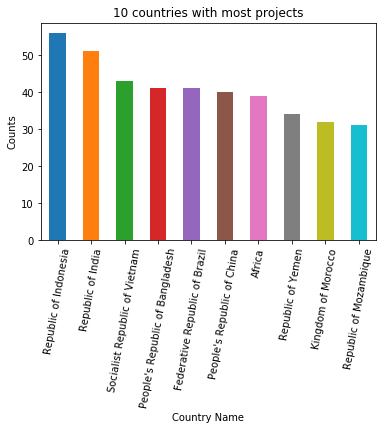

In [230]:
# Visualize 10 countries with most projects
plot1=top10_countries.plot.bar(x='Country Name',y='Counts',legend=False)
plot1.set_ylabel('Counts')
plt.title('10 countries with most projects')
plt.xticks(rotation='80')
plt.show()

# Or alternatively, use seaborn for plotting
# plot1=sns.barplot(x='Country Name',y='Counts',data=top10_countries)
# plt.xticks(rotation='80')
# plot1.set(ylabel='Counts')

## 2. Find the top 10 major project themes: 

In [231]:
# count frequency of codes
freq_proj=df2_norm.code.value_counts()
print(freq_proj)

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: code, dtype: int64


In [232]:
#Create a dictionary with code and name of projects
code=df2_norm.code
name=df2_norm.name
projects=dict(zip(code,name))
print(projects) # project name for '1' and '6' are missing

{'8': 'Human development', '11': 'Environment and natural resources management', '1': '', '6': '', '5': 'Trade and integration', '2': 'Public sector governance', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [233]:
# Find names for 1 and 6 via subsetting
print((df2_norm.loc[df2_norm['code']=='1']).iloc[1,1])
print((df2_norm.loc[df2_norm['code']=='6']).iloc[1,1])

Economic management
Social protection and risk management


In [234]:
# Fill in the missing values of 1 and 6 in the dictionary
projects['1']='Economic management'
projects['6']='Social protection and risk management'
print(projects)

{'8': 'Human development', '11': 'Environment and natural resources management', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [235]:
# Create a data frame with top 10 major project

top10_projects = pd.DataFrame({'Code':freq_proj[0:10].index,'Counts':freq_proj[0:10].values})

# Add project themes
top10_projects["Theme"]= top10_projects.Code.map(projects)

In [236]:
print(top10_projects)

  Code  Counts                                         Theme
0   11     250  Environment and natural resources management
1   10     216                             Rural development
2    8     210                             Human development
3    2     199                      Public sector governance
4    6     168         Social protection and risk management
5    4     146      Financial and private sector development
6    7     130                   Social dev/gender/inclusion
7    5      77                         Trade and integration
8    9      50                             Urban development
9    1      38                           Economic management


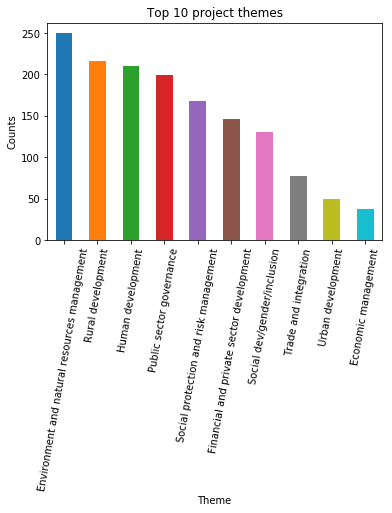

In [237]:
# Visualize top 10 project themes 
plot2=top10_projects.plot.bar(x='Theme',y='Counts',legend=False)
plot2.set_ylabel('Counts')

plt.title('Top 10 project themes')
plt.xticks(rotation='80')
plt.show()

## 3. Create a new dataframe df3 with missing value filled in

In [238]:
# Create a dataframe df3, which is a copy of df2_norm
df3 = df2_norm.copy(deep=True)

In [239]:
# Fill in missing values using the dictionary "projects"
df3.name =df3.code.map(projects)

In [240]:
df3.head()

,code,name,countrycode,countryname
0,8,Human development,ET,Federal Democratic Republic of Ethiopia
1,11,Environment and natural resources management,ET,Federal Democratic Republic of Ethiopia
2,1,Economic management,TN,Republic of Tunisia
3,6,Social protection and risk management,TN,Republic of Tunisia
4,5,Trade and integration,TV,Tuvalu


In [241]:
# compare with df2_norm to confirm that missing values have been filled

In [242]:
df2_norm.head()

,code,name,countrycode,countryname
0,8,Human development,ET,Federal Democratic Republic of Ethiopia
1,11,,ET,Federal Democratic Republic of Ethiopia
2,1,Economic management,TN,Republic of Tunisia
3,6,Social protection and risk management,TN,Republic of Tunisia
4,5,Trade and integration,TV,Tuvalu
